# Sign Glove

Ploting the Data we get from the IMU sensor to visually see the difference between the signs

Import Libraries and connect to Google Drive

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Import NumPy for numerical computations

# generate accesss to the drive (=data)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This code loads IMU data from a CSV file that contains the measurements for . The data is split to create separate columns for each finger and then converted to numeric values. Rows with missing values are removed and then scaling factors are calculated to ensure that the data from all fingers have a similar starting value. These scaling factors are applied to each sensor's data to normalise the data and make it more suitable for comparison.

Index(['XAcc;YAcc;ZAcc;XGyro;YGyro;ZGyro'], dtype='object')


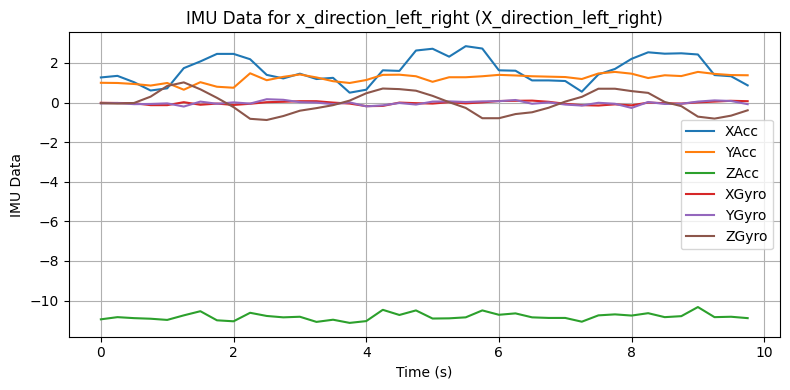

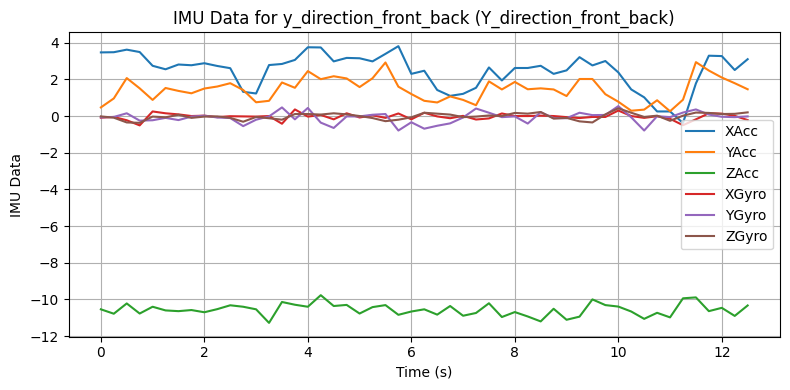

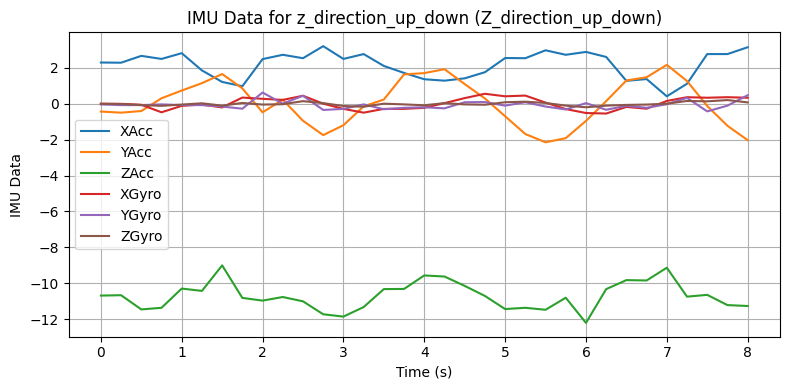

In [19]:
# Liste der Dateipfade
file_paths = ["/content/drive/MyDrive/Colab Notebooks/MCI /Sign Glove/Data/IMU/x_direction_left_right.csv",
              "/content/drive/MyDrive/Colab Notebooks/MCI /Sign Glove/Data/IMU/y_direction_front_back.csv",
              "/content/drive/MyDrive/Colab Notebooks/MCI /Sign Glove/Data/IMU/z_direction_up_down.csv",]

# Process and plot the data for each file
for file_path in file_paths:
    # Read the data
    df = pd.read_csv(file_path)

print(df.columns)

# Process and plot the data for each file
for file_path in file_paths:
    # Read the data
    df = pd.read_csv(file_path)

    # Split the single column into multiple columns
    df[['XAcc', 'YAcc', 'ZAcc', 'XGyro', 'YGyro', 'ZGyro']] = df['XAcc;YAcc;ZAcc;XGyro;YGyro;ZGyro'].str.split(';', expand=True)

    # Convert sensor values to numeric, handle errors with coerce
    df[['XAcc', 'YAcc', 'ZAcc', 'XGyro', 'YGyro', 'ZGyro']] = df[['XAcc', 'YAcc', 'ZAcc', 'XGyro', 'YGyro', 'ZGyro']].apply(pd.to_numeric, errors='coerce')

    # Drop any rows with missing values
    df.dropna(inplace=True)

    # Calculate the time vector based on the sampling rate (250 ms)
    sampling_rate = 0.25  # Sampling rate in seconds
    time_vector = np.arange(0, len(df) * sampling_rate, sampling_rate)

    # Plotting IMU data for each axis
    plt.figure(figsize=(8, 4))

    # Plotting acceleration data
    plt.plot(time_vector, df['XAcc'], label='XAcc')
    plt.plot(time_vector, df['YAcc'], label='YAcc')
    plt.plot(time_vector, df['ZAcc'], label='ZAcc')

    # Plotting gyroscope data
    plt.plot(time_vector, df['XGyro'], label='XGyro')
    plt.plot(time_vector, df['YGyro'], label='YGyro')
    plt.plot(time_vector, df['ZGyro'], label='ZGyro')

    plt.xlabel('Time (s)')
    plt.ylabel('IMU Data')
    plt.title(f'IMU Data for {file_path.split("/")[-1].split(".")[0]} ({file_path.split("/")[-1].split(".")[0].capitalize()})')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()
